# Disease prediction.
---
Cardiovascular disease are among the leading causes of death worldwide, impacting millions of people each year. They are often associated with risk factors such as high blood pressure, diabetes, smoking, and unhealthy lofestyle choises, which contribute to their development and progression.

Maschine learning has emerged as a powerful tool across various fields, particularly in healthcare, where it plays a vital role in diagnosing, predicting, and treating diseases. This report explores the application of ML in predicting cardiovascular diseases, highlightingits potensial to enhace early detection, risk assessment, and patient outcomes.

### Exploratory Data Analysis.
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import analysis

In [3]:
df = pd.read_csv('cardio_train.csv', sep=';', index_col=0)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


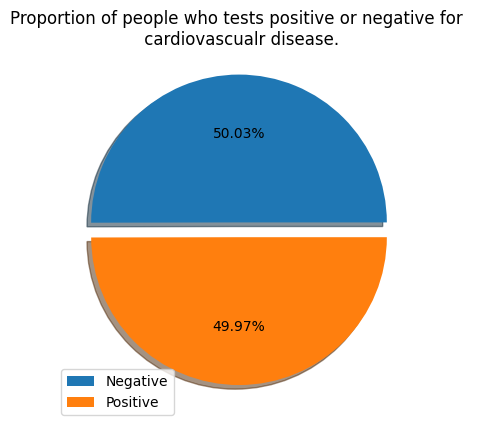

In [4]:
analysis.plot_pos_neg(df);

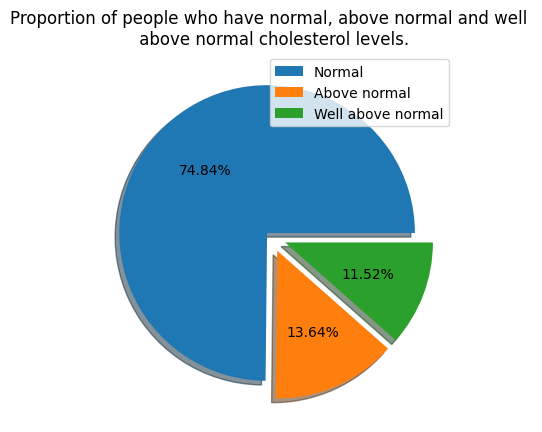

In [5]:
analysis.plot_cholesterol(df);

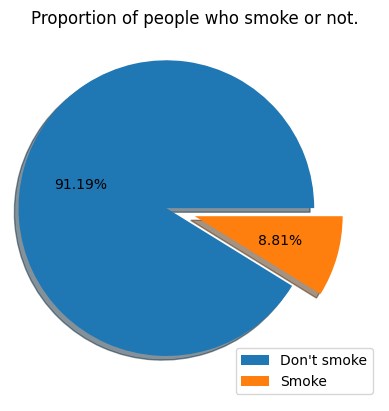

In [6]:
analysis.plot_smoke(df);

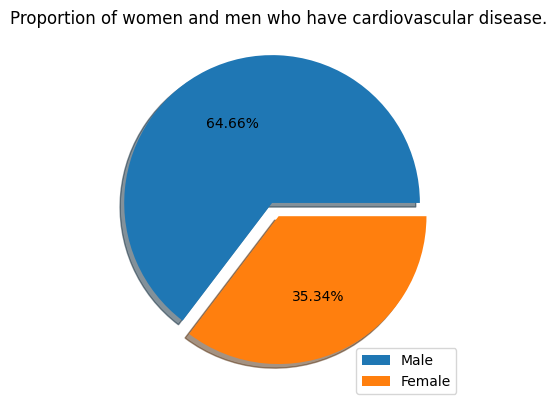

In [7]:
analysis.plot_men_women(df);

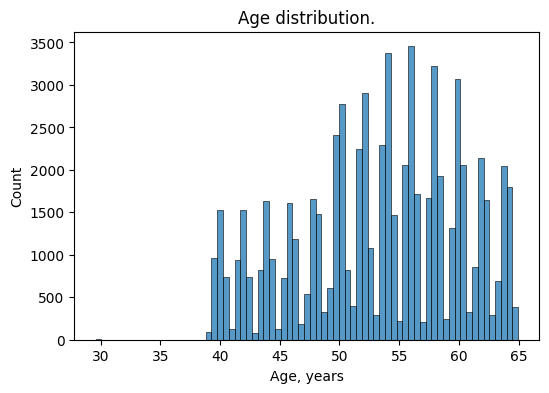

In [8]:
analysis.plot_age(df);

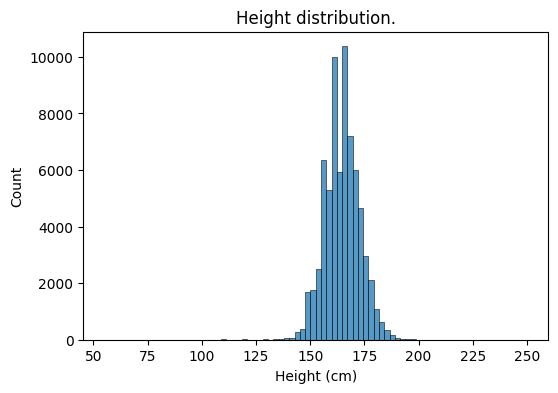

In [9]:
analysis.plot_height(df);

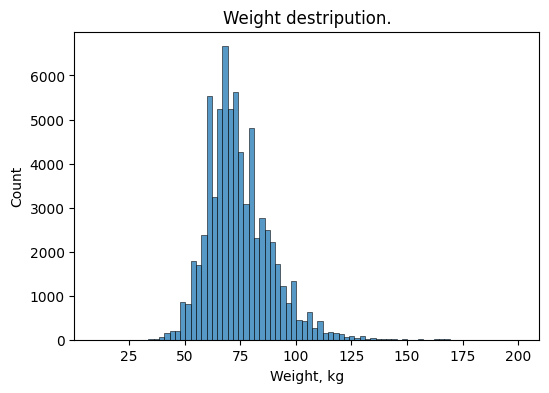

In [10]:
analysis.plot_weight(df);

### Feature engineering BMI.
---

In [11]:
analysis.bmi(df)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35.0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24.0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29.0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0


In [12]:
# outliers bmi
Q1, Q3 = np.quantile(df['bmi'], 0.25), np.quantile(df['bmi'], 0.75)
IQR = Q3 - Q1
threshold = 1.9
df = df[(df['bmi'] >= Q1 - threshold * IQR) & ( df['bmi'] <= Q3 + threshold * IQR)]

In [13]:
analysis.bmi_cat(df)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_cat
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,normal range
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35.0,obese (class 1)
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24.0,normal range
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29.0,over-weight
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0,normal range


### Feature engineering Blood Pressure.
---

In [14]:
# outliers ap_lo
Q1, Q3 = np.quantile(df['ap_hi'], 0.25), np.quantile(df['ap_hi'], 0.75)
IQR = Q3 - Q1
threshold = 1.5
df = df[(df['ap_hi'] >= Q1 - threshold * IQR) & ( df['ap_hi'] <= Q3 + threshold * IQR)]

In [15]:
# outliers ap_lo
Q1, Q3 = np.quantile(df['ap_lo'], 0.25), np.quantile(df['ap_lo'], 0.75)
IQR = Q3 - Q1
threshold = 1.5
df = df[(df['ap_lo'] >= Q1 - threshold * IQR) & ( df['ap_lo'] <= Q3 + threshold * IQR)]

In [16]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62811 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          62811 non-null  int64   
 1   gender       62811 non-null  int64   
 2   height       62811 non-null  int64   
 3   weight       62811 non-null  float64 
 4   ap_hi        62811 non-null  int64   
 5   ap_lo        62811 non-null  int64   
 6   cholesterol  62811 non-null  int64   
 7   gluc         62811 non-null  int64   
 8   smoke        62811 non-null  int64   
 9   alco         62811 non-null  int64   
 10  active       62811 non-null  int64   
 11  cardio       62811 non-null  int64   
 12  bmi          62811 non-null  float64 
 13  bmi_cat      62811 non-null  category
dtypes: category(1), float64(2), int64(11)
memory usage: 6.8 MB
